# Movie Recommender Systems

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import dataset

In [217]:
df_movies = pd.read_csv("movies.dat", sep='::', engine='python', names = ['MovieID','Title','Genre'], encoding = "ISO-8859-1")
df_ratings = pd.read_csv("ratings.dat", sep='::', engine='python', names = ['UserID','MovieID','Rating','Timestamp'], encoding = "ISO-8859-1")
df_users = pd.read_csv("users.dat", sep='::', engine='python', names = ['UserID','Gender','Age','Occupation','Zip-code'], encoding = "ISO-8859-1")

In [4]:
df_movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Merge dataframe

In [10]:
df_pre = df_ratings.merge(df_movies, left_on = 'MovieID', right_on = 'MovieID', how = 'inner')
df_pre.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:
df = df_pre.merge(df_users,left_on = 'UserID', right_on = 'UserID', how = 'inner' )
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [12]:
df.shape

(1000209, 10)

#### check null values

In [18]:
df.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genre         0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

#### Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genre       1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [20]:
df['Age'] = df['Age'].astype('str')
df['Occupation'] = df['Occupation'].astype('str')

In [22]:
df.dtypes

UserID         int64
MovieID        int64
Rating         int64
Timestamp      int64
Title         object
Genre         object
Gender        object
Age           object
Occupation    object
Zip-code      object
dtype: object

#### summary statistics

In [21]:
df.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [23]:
df.describe(include = ["O"])

,Title,Genre,Gender,Age,Occupation,Zip-code
count,1000209,1000209,1000209,1000209,1000209,1000209
unique,3706,301,2,7,21,3439
top,American Beauty (1999),Comedy,M,25,4,94110
freq,3428,116883,753769,395556,131032,3802


### EDA

<AxesSubplot:xlabel='Rating', ylabel='count'>

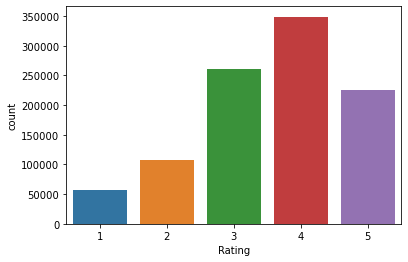

In [28]:
sns.countplot(x='Rating',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

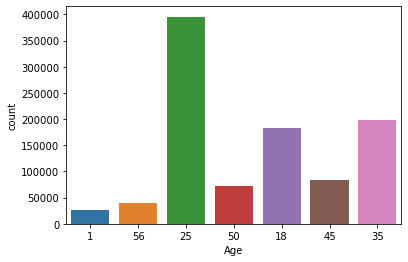

In [29]:
sns.countplot(x='Age',data=df)

##### 1: "Under 18"; 18: "18-24"; 25: "25-34"; 35: "35-44"; 45: "45-49"; 50: "50-55"; 56: "56+"

In [40]:
a = []
for i in df['Age']:
    if i == '1':
        y_1 = 'Under 18'
    elif i == '18' :
        y_1 = '18-24'
    elif i == '25' :
        y_1 = '25-34'
    elif i == '35' :
        y_1 = '35-44'
    elif i == '45' :
        y_1 = '45-49'
    elif i == '50' :
        y_1 = '50-55'
    else:
        y_1 = '56+'
    a.append(y_1)

<AxesSubplot:ylabel='count'>

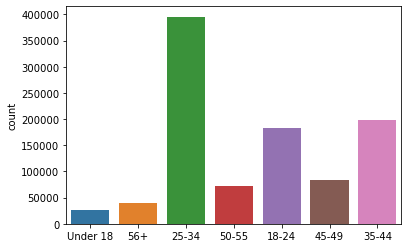

In [41]:
sns.countplot(x= a)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

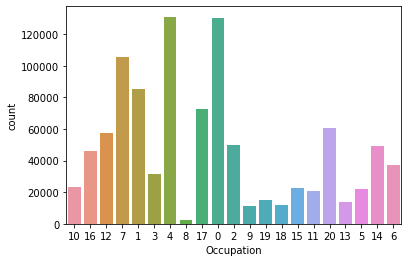

In [31]:
sns.countplot(x='Occupation',data=df)

##### 0: "other" or not specified; 1: "academic/educator"; 2: "artist"; 3: "clerical/admin"; 4: "college/grad student"; 5: "customer service"; 6: "doctor/health care"; 7: "executive/managerial"; 8: "farmer"; 9: "homemaker"; 10: "K-12 student"; 11: "lawyer"; 12: "programmer"; 13: "retired"; 14: "sales/marketing"; 15: "scientist"; 16: "self-employed"; 17: "technician/engineer"; 18: "tradesman/craftsman"; 19: "unemployed"; 20: "writer”

<AxesSubplot:xlabel='Age', ylabel='Rating'>

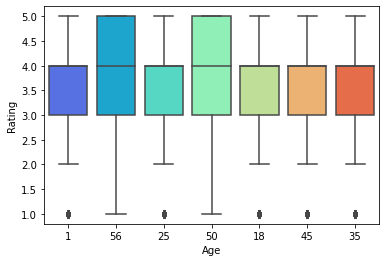

In [44]:
sns.boxplot(x="Age", y="Rating", data=df,palette='rainbow')

<AxesSubplot:xlabel='Occupation', ylabel='Rating'>

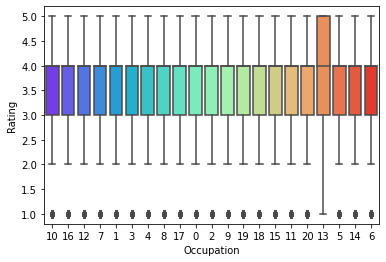

In [46]:
sns.boxplot(x="Occupation", y="Rating", data=df,palette='rainbow')

### Feature Engineering

In [55]:
import re

In [56]:
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [57]:
df['Year'] = df['Title'].apply(lambda x: int(re.sub(r"[^0-9]", "", x.split()[-1])))

In [58]:
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code,Year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,1975
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,1996
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,1964
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,1998


In [89]:
genre_type = set()
for i in range(df.shape[0]):
    genre = df['Genre'][i].split('|')
    for j in genre:
        genre_type.add(j)

In [90]:
genre_type

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [87]:
b = str(df.iloc[1, :]['Genre']).split('|')
b

['Animation', "Children's", 'Musical']

In [64]:
genre_list

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [91]:
for i in genre_type:
    df[i] = df['Genre'].apply(lambda x: int(i in x))

In [93]:
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code,...,Animation,Children's,Drama,Fantasy,Adventure,War,Sci-Fi,Crime,Comedy,Action
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,1,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,1,1,0,0,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,1,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,1,1,0,0,0,0,0,0,1,0


### Content-Based Filtering- superwised

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [106]:
all_movies = list(df["Title"].unique())

In [107]:
def createMovieList(df, UserID, movies = all_movies):
    movies_seen = df.loc[df.UserID == UserID, :]["Title"].unique()
    movies_not_seen = []
    for movie in all_movies:
        if movie not in movies_seen:
            movies_not_seen.append(movie)
    output = pd.DataFrame({"Title": movies_not_seen})
    return output

In [108]:
movie_list = createMovieList(df, 1)

In [113]:
def contentBasedMovieRecommender2(df, UserID):
    df_user = df.loc[df.UserID == UserID, :]
    X = df.drop(["Rating","UserID", "MovieID", "Timestamp", "Title", "Genre", "Gender", "Zip-code", "Age", "Occupation"], axis = 1)
    y = df["Rating"].apply(lambda x: int(x >= 4))
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    
    # build a model
    weights = y_test.sum()/len(y_test)
#     clf = LogisticRegression(class_weight = "balanced").fit(X_train, y_train)
    clf = RandomForestClassifier(class_weight = "balanced").fit(X_train, y_train)
    # model evaluation
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    # create recommended movie list 
    movie_list = createMovieList(df, UserID)
    df_movies = df.merge(movie_list, left_on = "Title", right_on = "Title", how = "inner")
    
    X_movies = df_movies.drop(["Rating","UserID", "MovieID", "Timestamp", "Genre", "Gender", "Zip-code", "Age", "Occupation"], axis = 1).drop_duplicates()
    movie_ratings = clf.predict_proba(X_movies.drop(["Title"], axis = 1))
    X_movies["score"] = movie_ratings[:, 1]
    X_movies
    recommendations = list(X_movies.sort_values(["score"], ascending = False)["Title"])[:10]
    return recommendations, precision_train, precision_test, recall_train, recall_test

In [114]:
recommendations, precision_train, precision_test, recall_train, recall_test = contentBasedMovieRecommender2(df, 2)

In [112]:
recommendations

['Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
 'Godfather, The (1972)',
 'One Little Indian (1973)',
 'Sanjuro (1962)',
 'Grand Illusion (Grande illusion, La) (1937)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Close Shave, A (1995)',
 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
 'Swing Kids (1993)',
 "Schindler's List (1993)"]

In [115]:
print(precision_train, precision_test, recall_train, recall_test)

0.7034111260418874 0.7030832160860208 0.6562811668205769 0.6558284661382283


### Content-Based Filtering- unsuperwised

In [150]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from string import punctuation
import re
import gensim
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings(action = 'ignore')
from nltk.corpus import wordnet as wn

In [154]:
import ssl
try:
      _create_unverified_https_context =     ssl._create_unverified_context
except AttributeError:
      pass
else:
     ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wenzhuowu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wenzhuowu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Create unified text field (Title + Genre)

In [155]:
df1 = df.drop(genre_list, axis = 1)
df1["unified_text"] =  df["Genre"] + " " + df["Title"]

In [156]:
df1.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code,Year,unified_text
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,1975,Drama One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,1996,Animation|Children's|Musical James and the Gia...
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,1964,Musical|Romance My Fair Lady (1964)
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,2000,Drama Erin Brockovich (2000)
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,1998,"Animation|Children's|Comedy Bug's Life, A (1998)"


In [157]:
stop_words =  stopwords.words('english')
def textCleaning(t, stop_words = stop_words):
    t = re.sub(r"[^A-Za-z0-9]", " ", t)
    t = re.sub(r"\'s", " ", t)
    t = ''.join([c for c in t if c not in punctuation])
    t = t.lower()
    
    #remove stop words
    t = t.split()
    t = [w for w in t if not w.lower() in stop_words]
    
    #lemmatize each word
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in t]
    t = " ".join(lemmatized_words)
    return t

In [158]:
df1["unified_text_preprocessed"] = df1["unified_text"].apply(lambda x: textCleaning(x))
df1.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip-code,Year,unified_text,unified_text_preprocessed
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,1975,Drama One Flew Over the Cuckoo's Nest (1975),drama one flew cuckoo nest 1975
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,1996,Animation|Children's|Musical James and the Gia...,animation child musical james giant peach 1996
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,1964,Musical|Romance My Fair Lady (1964),musical romance fair lady 1964
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,2000,Drama Erin Brockovich (2000),drama erin brockovich 2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,1998,"Animation|Children's|Comedy Bug's Life, A (1998)",animation child comedy bug life 1998


#### Bag of word

In [162]:
df1_movies = df1[["unified_text_preprocessed", "Title"]].drop_duplicates()
df1_movies.head()

,unified_text_preprocessed,Title
0,drama one flew cuckoo nest 1975,One Flew Over the Cuckoo's Nest (1975)
1,animation child musical james giant peach 1996,James and the Giant Peach (1996)
2,musical romance fair lady 1964,My Fair Lady (1964)
3,drama erin brockovich 2000,Erin Brockovich (2000)
4,animation child comedy bug life 1998,"Bug's Life, A (1998)"


In [164]:
sentences = df1_movies["unified_text_preprocessed"].values

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences)

sentence_vector = vectorizer.transform(sentences)

In [183]:
print(sentence_vector)

  (0, 66)	1
  (0, 972)	1
  (0, 1158)	1
  (0, 1424)	1
  (0, 2537)	1
  (0, 2620)	1
  (1, 87)	1
  (1, 235)	1
  (1, 762)	1
  (1, 1547)	1
  (1, 1921)	1
  (1, 2485)	1
  (1, 2710)	1
  (2, 55)	1
  (2, 1310)	1
  (2, 2075)	1
  (2, 2485)	1
  (2, 3044)	1
  (3, 94)	1
  (3, 578)	1
  (3, 1158)	1
  (3, 1268)	1
  (4, 89)	1
  (4, 235)	1
  (4, 606)	1
  :	:
  (3699, 1088)	1
  (3700, 86)	1
  (3700, 145)	1
  (3700, 865)	1
  (3700, 1158)	1
  (3700, 2952)	1
  (3700, 3619)	1
  (3701, 64)	1
  (3701, 327)	1
  (3701, 1789)	1
  (3702, 94)	1
  (3702, 1158)	1
  (3702, 1481)	1
  (3702, 3084)	1
  (3703, 87)	1
  (3703, 843)	1
  (3703, 2624)	1
  (3703, 3165)	1
  (3704, 85)	1
  (3704, 173)	1
  (3704, 1158)	1
  (3704, 3877)	1
  (3705, 71)	1
  (3705, 1158)	1
  (3705, 3932)	1


In [185]:
type(sentence_vector)

scipy.sparse.csr.csr_matrix

In [166]:
def addTextVector(df_movies, sentence_vector):
    ls = []
    arr = sentence_vector.toarray()
    for i in range(arr.shape[0]):
        ls.append(arr[i])
    df_movies["vector"] = ls
    return df_movies

In [169]:
df1_movies = addTextVector(df1_movies, sentence_vector)

In [170]:
df1_movies.head()

,unified_text_preprocessed,Title,vector
0,drama one flew cuckoo nest 1975,One Flew Over the Cuckoo's Nest (1975),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,animation child musical james giant peach 1996,James and the Giant Peach (1996),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,musical romance fair lady 1964,My Fair Lady (1964),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,drama erin brockovich 2000,Erin Brockovich (2000),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,animation child comedy bug life 1998,"Bug's Life, A (1998)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Word Embedding

In [187]:
from gensim.models import Word2Vec
from gensim.similarities import Similarity

In [188]:
all_words = [nltk.word_tokenize(s) for s in sentences]

In [177]:
word2vec = Word2Vec(all_words, min_count=1)
vocabulary = list(word2vec.wv.index_to_key)
v1 = word2vec.wv['story']

In [178]:
v1

array([-0.06239826,  0.05460928,  0.03209926,  0.01942981,  0.01234408,
       -0.14310224,  0.0596038 ,  0.189106  , -0.08528087, -0.08926269,
       -0.00911913, -0.13944462,  0.00065584,  0.03911028,  0.02970334,
       -0.05710608,  0.06563702, -0.08116353, -0.01505399, -0.20296876,
        0.07211339,  0.03954473,  0.11748798, -0.06086905,  0.00420033,
        0.02892687, -0.06512552,  0.01719428, -0.0819165 ,  0.00097466,
        0.06843163, -0.02486857,  0.03149919, -0.10485697, -0.04682087,
        0.07376784,  0.03671215, -0.04461177, -0.0691447 , -0.11411793,
        0.01469259, -0.0744376 , -0.07250275,  0.03336517,  0.05786217,
       -0.0389885 , -0.06141255, -0.06177918,  0.04166197,  0.0746275 ,
        0.0584544 , -0.09153006, -0.02938132, -0.04136258, -0.02910458,
        0.03154961,  0.06290667, -0.03001313, -0.04665437,  0.04541107,
        0.00087536, -0.02573944,  0.03722024,  0.02657099, -0.12040618,
        0.11325517, -0.02040787,  0.06933329, -0.10404142,  0.11

In [179]:
v2 = word2vec.wv['toy']
v2

array([-5.9397986e-05, -4.5643449e-03, -6.7870296e-03, -3.6500266e-03,
       -2.7757003e-03,  5.3274864e-03, -8.0399131e-03, -7.3326076e-03,
        2.7060495e-03,  4.4663581e-03, -1.6590269e-04, -8.0050086e-06,
        9.1847973e-03, -8.8585466e-03, -3.4240326e-03,  9.8133879e-03,
        6.9512664e-03, -9.2683248e-03,  6.2860469e-03,  7.6425127e-03,
        9.9290377e-03,  5.2365763e-03,  2.0629897e-04, -3.9716824e-03,
       -1.0042183e-02, -8.9566233e-03,  7.5248429e-03, -3.7467333e-05,
       -5.5725533e-03, -3.6005888e-03,  4.4963467e-03, -1.6080925e-03,
       -4.1779137e-04,  9.9002430e-03, -7.7313213e-03, -4.2599244e-03,
       -9.5388452e-03, -6.2156981e-03,  4.1080406e-04, -4.9990467e-03,
        5.9120585e-03, -2.3264057e-04,  8.6491723e-03,  7.3738750e-03,
        1.1672517e-03,  1.5530080e-03, -6.1273472e-03,  1.1029878e-03,
       -5.5514514e-03,  2.9769756e-03, -8.3759325e-03,  1.3406773e-03,
        5.6360443e-03,  5.7889335e-04, -3.7104436e-03, -1.4028165e-03,
      

#### 1. For a given user, find 5 movies with highest ratings that were most recently watched by the user
#### 2. For each movie in above list, compute cosine similarities against the movies not yet watched by the user
#### 3. For each movie in above list, return 2 movies with highest similarity scores

In [192]:
all_movies = list(df["Title"].unique())

In [193]:
def cosSim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [194]:
def createMovieList(df_movies, UserID, movies = all_movies):
    movies_seen = df.loc[df.UserID == UserID, :]["Title"].unique()
    movies_not_seen = []
    for movie in all_movies:
        if movie not in movies_seen:
            movies_not_seen.append(movie)
    df_movie_not_seen = pd.DataFrame({"Title": movies_not_seen})
    df_output = df_movies[["Title", "unified_text_preprocessed", "vector"]].merge(df_movie_not_seen, left_on = "Title", right_on = "Title")
    return df_output

In [197]:
def findMovieSimilarity(model, movie_name1, movie_name2):
    v1 = v2 = np.zeros(100)
    l1 = movie_name1.split(" ")
    l2 = movie_name2.split(" ")
    for m1 in l1:
        if m1 in vocabulary:
            v1 = v1 + model.wv[m1]
    for m2 in l2:
        if m2 in vocabulary:
            v2 = v2 + model.wv[m2]
    sim = cosSim(v1, v2)
    return sim

In [198]:
def movieRecommender1(df, UserID):
    # get 5 movies with highest ratings that were most recently watched by the user 
    top_movies_list = df.loc[df.UserID == UserID, :].sort_values(["Rating", "Timestamp"], ascending = False).head().unified_text_preprocessed.values
    
    # get the list of movies that haven't been watched by this user
    df_unwatched_movie_list = createMovieList(df_movies, UserID)
    df_unwatched_movie_list.reset_index(inplace = True)
    recommendations = []
    
    # calculate the similarty between unwatched movies and the 5 movies 
    for m1 in top_movies_list:
        ls_sim = []
        for i in range(df_unwatched_movie_list.shape[0]):
            m2 = df_unwatched_movie_list.iloc[i, :]["unified_text_preprocessed"]
            
            # calculate cosine similarity between the two word2vec vectors
            sim = findMovieSimilarity(word2vec, m1, m2)
            ls_sim.append([sim, df_unwatched_movie_list.iloc[i, :]["Title"]])
        ls_sim.sort(key = lambda x: x[0], reverse = True)
        
        # append top 2 most similar movies to the recommendation list
        recommendations.append(ls_sim[0][1])
        recommendations.append(ls_sim[1][1])
    return recommendations

In [199]:
def movieRecommender2(df, UserID):
    # get 5 movies with highest ratings that were most recently watched by the user 
    top_movies_list = df.loc[df.UserID == UserID, :].sort_values(["Rating", "Timestamp"], ascending = False).head().Title.values
    
    # get the list of movies that haven't been watched by this user
    df_unwatched_movie_list = createMovieList(df_movies, UserID)
    df_unwatched_movie_list.reset_index(inplace = True)
    recommendations = []
    
    # calculate the similarty between unwatched movies and the 5 movies 
    for m1 in top_movies_list:
        v1 = df_movies.loc[df_movies.Title == m1, :]["vector"].values[0]
        ls_sim = []
        for i in range(df_unwatched_movie_list.shape[0]):
            v2 = df_unwatched_movie_list.iloc[i, :]["vector"]
            
            # calculate cosine similarity between the two BOW vectors
            sim = cosSim(v1, v2)
            ls_sim.append([sim, df_unwatched_movie_list.iloc[i, :]["Title"]])
        ls_sim.sort(key = lambda x: x[0], reverse = True)
        recommendations.append(ls_sim[0][1])
        recommendations.append(ls_sim[1][1])
    return recommendations

In [201]:
rec = movieRecommender1(df1, 1)
rec

['Goofy Movie, A (1995)',
 'Little Mermaid, The (1989)',
 'Rugrats Movie, The (1998)',
 'Paulie (1998)',
 'Sleeping Beauty (1959)',
 'All Dogs Go to Heaven 2 (1996)',
 'Goofy Movie, A (1995)',
 'Paulie (1998)',
 'War, The (1994)',
 'Truce, The (1996)']

In [202]:
rec2 = movieRecommender2(df1, 1)
rec2

['Goofy Movie, A (1995)',
 'Balto (1995)',
 'Rugrats Movie, The (1998)',
 'Madeline (1998)',
 'Sleeping Beauty (1959)',
 'Anastasia (1997)',
 'Goofy Movie, A (1995)',
 'Balto (1995)',
 'Swing Kids (1993)',
 'Heaven & Earth (1993)']

##### The recommendation from BOW and word embedding is different

#### Find top n similar movies for a given movie

In [203]:
def findMostSimilarMovies(df, movie_name, top_n):
    df_temp = df[["Title", "unified_text_preprocessed"]].drop_duplicates()
    df_temp.reset_index(inplace = True)
    processed_name = df_temp.loc[df_temp.Title == movie_name, :]["unified_text_preprocessed"]
    ls_sim = []
    for i in range(df_temp.shape[0]):
        if df_temp.iloc[i, :]["Title"] != movie_name:
            sim = findMovieSimilarity(word2vec, list(processed_name.values)[0], df_temp.iloc[i, :]["unified_text_preprocessed"])
#             print(sim, df_temp[i, :]["Title"])
            ls_sim.append([sim, df_temp.iloc[i, :]["Title"]])
    ls_sim.sort(key = lambda x: x[0], reverse = True)
    top_sim = []
    for i in range(top_n):
        top_sim.append(ls_sim[i][1])
    return top_sim

In [205]:
findMostSimilarMovies(df1, "Toy Story (1995)", 10)

['Toy Story 2 (1999)',
 'Goofy Movie, A (1995)',
 "Bug's Life, A (1998)",
 'Paulie (1998)',
 'Babe (1995)',
 'Problem Child (1990)',
 'Little Mermaid, The (1989)',
 'Hercules (1997)',
 'Pocahontas (1995)',
 'Close Shave, A (1995)']

### Collaborative Filtering (CF) - ItemCF

#### Compute movie-movie similarity score

In [333]:
from scipy.sparse import csr_matrix

In [334]:
df_movie_features = df_ratings.pivot(
    index='MovieID',
    columns='UserID',
    values='Rating'
)

In [335]:
df_movie_features = df_movie_features.T.fillna(df_movie_features.mean(axis = 0)).T

In [336]:
df_movie_features.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.188679,4.188679,4.188679,4.188679,4.000000,4.188679,4.000000,5.000000,5.000000,...,4.188679,4.000000,4.188679,4.188679,4.000000,4.188679,4.188679,4.188679,4.188679,3.000000
2,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,5.000000,...,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178
3,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,...,3.901961,3.901961,3.901961,3.901961,1.000000,3.901961,3.901961,3.901961,3.901961,3.901961
4,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,3.000000,4.190476,4.190476,...,4.190476,4.190476,4.190476,4.190476,2.000000,2.000000,4.190476,4.190476,4.190476,4.190476
5,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,...,3.146465,3.146465,3.146465,3.146465,1.000000,3.146465,3.146465,3.146465,3.146465,3.146465


In [337]:
df_movie_features.shape

(3706, 6040)

In [338]:
movie_user_mat_sparse = csr_matrix(df_movie_features.values)

In [339]:
movie_dict = {movie: i for i, movie in enumerate(list(df_movies.set_index('MovieID').loc[df_movie_features.index].Title))}

#### ItemCF Movie Recommender

In [340]:
def findSimilarMovies(fav_movie, n_recommendations, data = movie_user_mat_sparse, hashmap = movie_dict):
    from sklearn.neighbors import NearestNeighbors
    model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
    # fit KNN model
    model.fit(data)
    idx = hashmap[fav_movie]
    
    # find nearest neighbors based on cosine similarity for a fav_movie
    distances, indices = model.kneighbors(
        data[idx],
        n_neighbors=n_recommendations + 1)
    
    # return recommendation (movieId, distance)
    raw_recommends = list(zip(indices.squeeze().tolist(),distances.squeeze().tolist()))#
    raw_recommends.sort(key=lambda x: x[1], reverse = True)
    reverse_hashmap = {v: k for k, v in hashmap.items()}
    recommendations = []
    for i, (idx, dist) in enumerate(raw_recommends):
        recommendations.append(reverse_hashmap[idx])
    recommendations.remove(fav_movie)
    return recommendations

In [341]:
def movieRecommender1(df, UserID):
    # get 5 movies with highest ratings that were most recently watched by the user 
    top_movies_list = df.loc[df.UserID == UserID, :].sort_values(["Rating", "Timestamp"], ascending = False).head().Title.values
    
    # get the list of movies that haven't been watched by this user
    df_unwatched_movie_list = createMovieList(df, UserID)
    df_unwatched_movie_list.reset_index(inplace = True)
    recommendations = set()
    
    # calculate the similarty between unwatched movies and the 5 movies
    for m in top_movies_list:
        rec = findSimilarMovies(m, 2)
        for i in rec:
            recommendations.add(i)
    
    return recommendations

In [342]:
rec = movieRecommender1(df, 1)
rec

{'Bandits (1997)',
 'Big Combo, The (1955)',
 'Choices (1981)',
 'Little Lord Fauntleroy (1936)',
 'Little Men (1998)',
 'Man from Down Under, The (1943)',
 'Small Wonders (1996)',
 'Stag (1997)',
 'War at Home, The (1996)',
 'Wings of Courage (1995)'}

In [343]:
def cosSim1(a, b):
    return dot(a, b)/(norm(a.toarray())*norm(b.toarray()))

In [344]:
def movieRecommender2(df, UserID):
    # get 5 movies with highest ratings that were most recently watched by the user 
    top_movies_list = df.loc[df.UserID == UserID, :].sort_values(["Rating", "Timestamp"], ascending = False).head().Title.values
    
    # get the list of movies that haven't been watched by this user
    df_unwatched_movie_list = createMovieList(df_movies, UserID)
    df_unwatched_movie_list.reset_index(inplace = True)
    recommendations = set()
    
    # calculate the similarty between unwatched movies and the 5 movies 
    for m1 in top_movies_list:
        v1 = movie_user_mat_sparse[movie_dict[m1]]
        ls_sim = []
        for i in range(df_unwatched_movie_list.shape[0]):
            m2 = df_unwatched_movie_list.iloc[i, :]["Title"]
            v2 = movie_user_mat_sparse[movie_dict[m2]]
            # calculate cosine similarity between the movie rating vectors
            sim = cosSim1(v1, v2.T)
            ls_sim.append([sim, df_unwatched_movie_list.iloc[i, :]["Title"]])
        ls_sim.sort(key = lambda x: x[0], reverse = True)
        
        # append top 2 most similar movies to the recommendation list
        recommendations.add(ls_sim[0][1])
        recommendations.add(ls_sim[1][1])
    return recommendations

In [345]:
rec2 = movieRecommender2(df, 1)
rec

{'Bandits (1997)',
 'Big Combo, The (1955)',
 'Choices (1981)',
 'Little Lord Fauntleroy (1936)',
 'Little Men (1998)',
 'Man from Down Under, The (1943)',
 'Small Wonders (1996)',
 'Stag (1997)',
 'War at Home, The (1996)',
 'Wings of Courage (1995)'}

### UserCF

In [346]:
m = createMovieList(df_movies, 1)

In [347]:
m.head()

,Title
0,Jumanji (1995)
1,Grumpier Old Men (1995)
2,Waiting to Exhale (1995)
3,Father of the Bride Part II (1995)
4,Heat (1995)


In [348]:
movie_user_mat_sparse[:,1].T

<1x3706 sparse matrix of type '<class 'numpy.float64'>'
	with 3706 stored elements in Compressed Sparse Column format>

In [349]:
def movieRecommender(df, UserID):
    # get the list of movies that haven't been watched by this user
    df_unwatched_movie_list = createMovieList(df_movies, UserID)
    df_unwatched_movie_list.reset_index(inplace = True)
    recommendations = set()
    
    # compute similarity dictionary between target user and other others
    user_similarity_dict = {}
    v1 = movie_user_mat_sparse[:, UserID]   
    for uid in range(1, len(df.UserID.unique())+1): 
        v2 = movie_user_mat_sparse[:, uid-1]
        # calculate cosine similarity between the two users
        sim = cosSim1(v1.T, v2)
        user_similarity_dict[uid] = sim
    # compute predicted rating for each new movie
    ls_predicted_ratings = []
    for i in range(df_unwatched_movie_list.shape[0]):
        m = df_unwatched_movie_list.iloc[i, :]["Title"]
        ls_sim = []
        weighted_ratings_sum = 0
        df_user_rating = df.loc[df.Title == m, :][["UserID", "Rating"]]
        df_user_rating.reset_index(inplace = True)
        for i in range(df_user_rating.shape[0]):
            cur_sim = user_similarity_dict[df_user_rating.iloc[i, :]["UserID"]]
            cur_rating = df_user_rating.iloc[i, :]["Rating"]
            ls_sim.append(cur_sim)
            weighted_ratings_sum += cur_rating * cur_sim
        predicted_rating = weighted_ratings_sum / sum(ls_sim)
        ls_predicted_ratings.append([predicted_rating, m])
    ls_predicted_ratings.sort(key = lambda x: x[0], reverse = True)
    recommendations = []
    for i in range(10):
        recommendations.append(ls_predicted_ratings[i][1])
    return recommendations

In [350]:
rec = movieRecommender(df, 1)

In [351]:
rec

['Schlafes Bruder (Brother of Sleep) (1995)',
 'Ulysses (Ulisse) (1954)',
 'Follow the Bitch (1998)',
 'Smashing Time (1967)',
 'Baby, The (1973)',
 'Song of Freedom (1936)',
 'One Little Indian (1973)',
 'Lured (1947)',
 'Bittersweet Motel (2000)',
 'Gate of Heavenly Peace, The (1995)']

### SVD

In [250]:
movie_user_mat = df_movie_features.values
from numpy.linalg import svd
U, sigma, V = svd(movie_user_mat, full_matrices = False)

####  Calculate $\sqrt{\Sigma'}$

In [251]:
sqrt_sigma = np.diag(np.sqrt(sigma))

#### Calculate Movie Latent Feature Matrix

In [252]:
movie_mat = np.dot(U, sqrt_sigma)
movie_mat.shape

(3706, 3706)

In [253]:
user_weight_mat = np.dot(sqrt_sigma, V)
user_weight_mat.shape

(3706, 6040)

In [254]:
def createMovieLists(df, UserID, movies = movie_dict):
    df_temp = df.loc[df.UserID == UserID, :][["Title", "Rating"]]
    movies_seen = df_temp["Title"].unique()
    movies_seen_dict = {}
    movies_not_seen_dict = {}
    for title in movie_dict:
        if title not in movies_seen:
            movies_not_seen_dict[movie_dict[title]] = title
        else:
            movies_seen_dict[movie_dict[title]] = df_temp.loc[df_temp.Title == title, "Rating"].values[0]
    return movies_seen_dict, movies_not_seen_dict

In [255]:
def movieRecommender_SVD(df, UserID, movie_mat = movie_mat, user_weight_mat = user_weight_mat):
    pred_ratings = []
    movies_seen, movies_not_seen = createMovieLists(df, UserID)
    for movie_idx in movies_not_seen:
        pred_rating = np.inner(movie_mat[movie_idx, :], user_weight_mat[:, UserID])
        pred_ratings.append([pred_rating, movies_not_seen[movie_idx]])
    pred_ratings.sort(key = lambda x: x[0], reverse = True)
    recommendations = []
    for i in pred_ratings[:10]:
        recommendations.append(i[1])
        
    # evaluation:
    se = []
    for movie_idx in movies_seen:
        pred_rating = np.inner(movie_mat[movie_idx, :], user_weight_mat[:, UserID])
        se_cur_movie = (pred_rating - movies_seen[movie_idx]) ** 2
        se.append(se_cur_movie)
    rmse = np.sqrt(np.mean(se))
    return recommendations, rmse

In [256]:
recommendations, rmse = movieRecommender_SVD(df, 1)

In [257]:
recommendations, rmse

(['Forrest Gump (1994)',
  'Few Good Men, A (1992)',
  'Lethal Weapon 3 (1992)',
  'Star Wars: Episode V - The Empire Strikes Back (1980)',
  'Graduate, The (1967)',
  'Hustler, The (1961)',
  'Jurassic Park (1993)',
  'Hunt for Red October, The (1990)',
  'Shawshank Redemption, The (1994)',
  'True Lies (1994)'],
 0.9487666805628026)